# Example use of LocalizeSL

First, initialize the environment to load the core files.

In [1]:
    rootdir='~/Dropbox/Code/LocalizeSL';
    addpath(fullfile(rootdir,'MFILES'));

Then, specify the site of interest using the PSMSL ID. See http://www.psmsl.org/data/obtaining/ for an index.

In [2]:
    selectedSite=597;

Load the corefile for the data set of interest. In this case, we will use the corefile containing the DP16 projections from Kopp et al. (2017).

In [3]:
    corefile=load(fullfile(rootdir,'IFILES/SLRProjections170113GRIDDEDcore-DP16-Pl5_15-BC.mat'));
    ccclab='DP16';

Now produce the local projections

In [4]:
    [sampslocrise,sampsloccomponents,siteids,sitenames,targyears,scens,cols] = LocalizeStoredProjections(selectedSite,corefile);
    nameshort=sitenames{1}(1:3);

Region 597 (GLOUCESTER POINT)- median in rcp85 2100 of 1778.55 mm
Region 597 (GLOUCESTER POINT)- median in rcp60 2100 of 1213.72 mm
Region 597 (GLOUCESTER POINT)- median in rcp45 2100 of 1170.06 mm
Region 597 (GLOUCESTER POINT)- median in rcp26 2100 of 756.71 mm


Generate a time series plot.

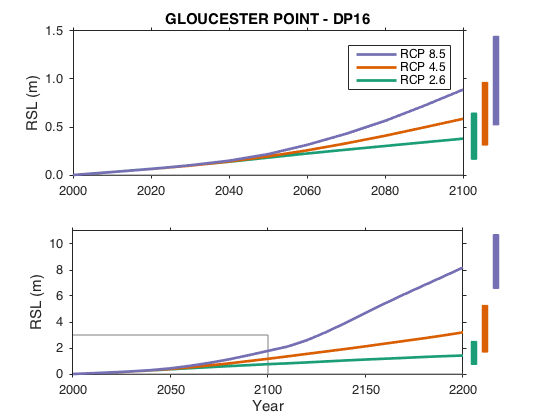

In [5]:
    [hp,hax,hax2]=PlotSLRProjection(sampslocrise,targyears);
    axes(hax(1));
    title([sitenames{1} ' - ' ccclab]);
  

Now let's look at the variance decomposition.

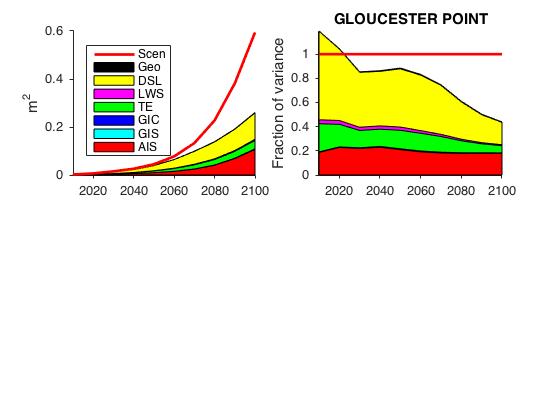

In [6]:
        cols.colIS=[cols.colAIS cols.colGIS];
        cols.colLI=[cols.colIS cols.colGIC];
 
        subcomp={cols.colAIS,cols.colIS,cols.colLI, [cols.colLI cols.colTE], ...
        [cols.colLI cols.colTE cols.colLS], [cols.colLI cols.colTE cols.colLS cols.colOD], ...
        [cols.colLI cols.colTE cols.colLS cols.colOD cols.colGIA]};

        complabls={'AIS','GIS','GIC','TE','LWS','DSL','Geo'};

        [hp,vars,fvars,hlg]=PlotSLRProjectionVariance(sampsloccomponents(:,[1 3 4]),targyears,cols,[2010 2100],1,2,1,subcomp,complabls,'rcbgmykrcbgm');
        title(sitenames{1});

And output several associated tables.

In [7]:
        % output quantiles of projections

        quantlevs=[.01 .05 .167 .5 .833 .95 .99 .995 .999];
        WriteTableSLRProjection(sampslocrise,quantlevs,siteids,sitenames,targyears,scens,['LSLproj_' ccclab '_' nameshort '_']);

        % output timing of height exceedances
        WriteTableSLRHeightExceedanceTiming(sampslocrise,[],siteids,sitenames,targyears,scens,1,['LSLheights_' ccclab '_' nameshort '_']);

        % output Monte Carlo samples

        WriteTableMC(sampsloccomponents,[],siteids,sitenames,targyears,scens,['LSLproj_MC_' ccclab '_' nameshort '_']);

        % output Monte Carlo samples without background trend,
        % to allow incorporation of alternative estimates of background trend

        WriteTableMC(sampsloccomponents,setdiff(1:size(sampsloccomponents{1},2),cols.colGIA),siteids,sitenames,targyears,scens,['LSLproj_MC_nobkgd_' ccclab '_' nameshort '_']);

        % output decomposition
        WriteTableDecomposition(sampsloccomponents,quantlevs,siteids,sitenames,targyears,cols,scens,['LSLproj_decomp_' ccclab '_' nameshort '_']);

Now repeat for K14.

In [8]:
        corefile=load(fullfile(rootdir,'IFILES/SLRProjections170113GRIDDEDcore.mat'));
        ccclab='K14';


In [9]:
    [sampslocrise,sampsloccomponents,siteids,sitenames,targyears,scens,cols] = LocalizeStoredProjections(selectedSite,corefile);
    nameshort=sitenames{1}(1:3);

Region 597 (GLOUCESTER POINT)- median in rcp85 2100 of 991.33 mm
Region 597 (GLOUCESTER POINT)- median in rcp60 2100 of 836.95 mm
Region 597 (GLOUCESTER POINT)- median in rcp45 2100 of 798.30 mm
Region 597 (GLOUCESTER POINT)- median in rcp26 2100 of 683.27 mm


Generate a time series plot.

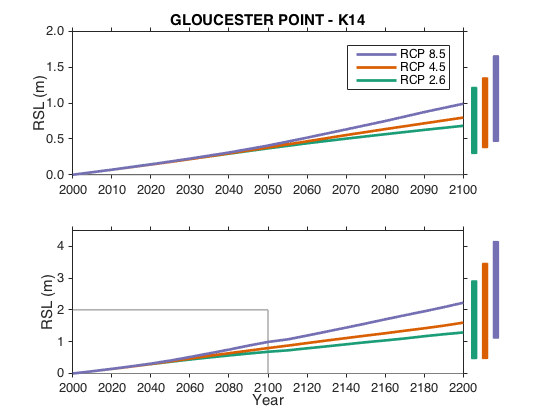

In [10]:
    [hp,hax,hax2]=PlotSLRProjection(sampslocrise,targyears);
    axes(hax(1));
    title([sitenames{1} ' - ' ccclab]);
  

Now let's look at the variance decomposition.

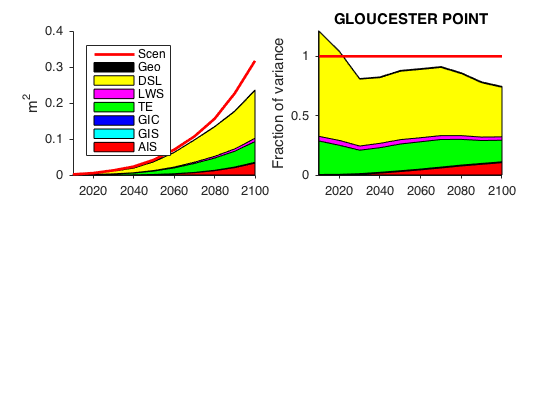

In [11]:
        cols.colIS=[cols.colAIS cols.colGIS];
        cols.colLI=[cols.colIS cols.colGIC];
 
        subcomp={cols.colAIS,cols.colIS,cols.colLI, [cols.colLI cols.colTE], ...
        [cols.colLI cols.colTE cols.colLS], [cols.colLI cols.colTE cols.colLS cols.colOD], ...
        [cols.colLI cols.colTE cols.colLS cols.colOD cols.colGIA]};

        complabls={'AIS','GIS','GIC','TE','LWS','DSL','Geo'};

        [hp,vars,fvars,hlg]=PlotSLRProjectionVariance(sampsloccomponents(:,[1 3 4]),targyears,cols,[2010 2100],1,2,1,subcomp,complabls,'rcbgmykrcbgm');
        title(sitenames{1});

And output several associated tables.

In [12]:
        % output quantiles of projections

        quantlevs=[.01 .05 .167 .5 .833 .95 .99 .995 .999];
        WriteTableSLRProjection(sampslocrise,quantlevs,siteids,sitenames,targyears,scens,['LSLproj_' ccclab '_' nameshort '_']);

        % output timing of height exceedances
        WriteTableSLRHeightExceedanceTiming(sampslocrise,[],siteids,sitenames,targyears,scens,1,['LSLheights_' ccclab '_' nameshort '_']);

        % output Monte Carlo samples

        WriteTableMC(sampsloccomponents,[],siteids,sitenames,targyears,scens,['LSLproj_MC_' ccclab '_' nameshort '_']);

        % output Monte Carlo samples without background trend,
        % to allow incorporation of alternative estimates of background trend

        WriteTableMC(sampsloccomponents,setdiff(1:size(sampsloccomponents{1},2),cols.colGIA),siteids,sitenames,targyears,scens,['LSLproj_MC_nobkgd_' ccclab '_' nameshort '_']);

        % output decomposition
        WriteTableDecomposition(sampsloccomponents,quantlevs,siteids,sitenames,targyears,cols,scens,['LSLproj_decomp_' ccclab '_' nameshort '_']);

Now repeat for Rasmussen et al 2018.

In [18]:
corefile=load(fullfile(rootdir,'IFILES/SLRProjections180124GRIDDEDcore_Tscens.mat'));
ccclab='R18';

% specify scenario labels and scenarios to use
% important since we differ from defaults here

scenlabs={'tmp15','tmp20','tmp25'};
selscens=[1 2 3];


In [19]:
[sampslocrise,sampsloccomponents,siteids,sitenames,targyears,scens,cols] = LocalizeStoredProjections(selectedSite,corefile,selscens);
nameshort=sitenames{1}(1:3);

Region 597 (GLOUCESTER POINT)- median in 1p5degree 2100 of 632.20 mm
Region 597 (GLOUCESTER POINT)- median in 2p0degree 2100 of 769.92 mm
Region 597 (GLOUCESTER POINT)- median in 2p5degree 2100 of 798.11 mm


Generate a time series plot.

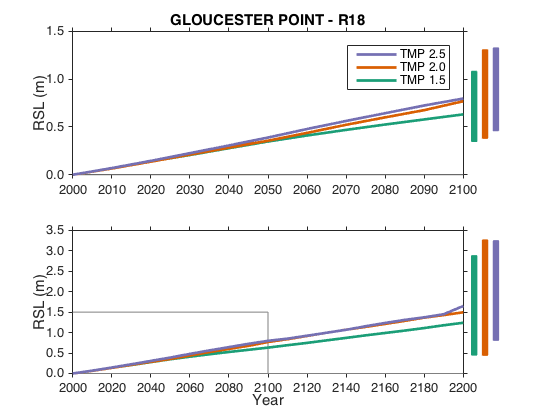

In [20]:
    [hp,hax,hax2]=PlotSLRProjection(sampslocrise,targyears,[],scenlabs,selscens);
    axes(hax(1));
    title([sitenames{1} ' - ' ccclab]);
  

Now let's look at the variance decomposition.

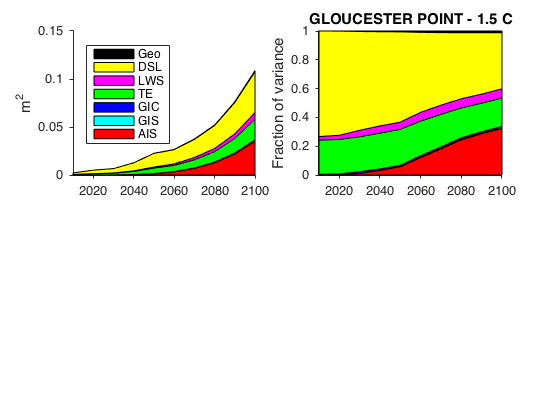

In [22]:
        cols.colIS=[cols.colAIS cols.colGIS];
        cols.colLI=[cols.colIS cols.colGIC];
 
        subcomp={cols.colAIS,cols.colIS,cols.colLI, [cols.colLI cols.colTE], ...
        [cols.colLI cols.colTE cols.colLS], [cols.colLI cols.colTE cols.colLS cols.colOD], ...
        [cols.colLI cols.colTE cols.colLS cols.colOD cols.colGIA]};

        complabls={'AIS','GIS','GIC','TE','LWS','DSL','Geo'};

        [hp,vars,fvars,hlg]=PlotSLRProjectionVariance(sampsloccomponents,targyears,cols,[2010 2100],1,1,[],subcomp,complabls,'rcbgmykrcbgm');
        title([sitenames{1} ' - 1.5 C']);

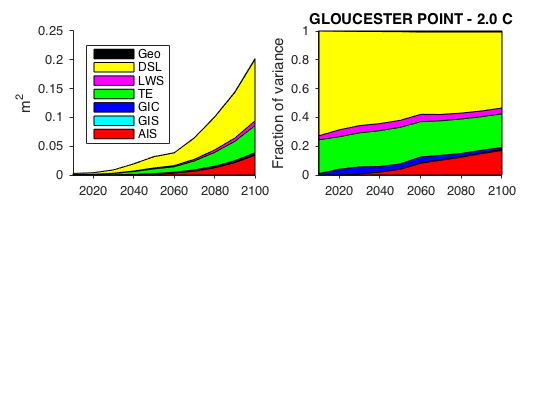

In [23]:
        cols.colIS=[cols.colAIS cols.colGIS];
        cols.colLI=[cols.colIS cols.colGIC];
 
        subcomp={cols.colAIS,cols.colIS,cols.colLI, [cols.colLI cols.colTE], ...
        [cols.colLI cols.colTE cols.colLS], [cols.colLI cols.colTE cols.colLS cols.colOD], ...
        [cols.colLI cols.colTE cols.colLS cols.colOD cols.colGIA]};

        complabls={'AIS','GIS','GIC','TE','LWS','DSL','Geo'};

        [hp,vars,fvars,hlg]=PlotSLRProjectionVariance(sampsloccomponents,targyears,cols,[2010 2100],1,2,[],subcomp,complabls,'rcbgmykrcbgm');
        title([sitenames{1} ' - 2.0 C']);

And output several associated tables.

In [24]:
        % output quantiles of projections

        quantlevs=[.01 .05 .167 .5 .833 .95 .99 .995 .999];
        WriteTableSLRProjection(sampslocrise,quantlevs,siteids,sitenames,targyears,scens,['LSLproj_' ccclab '_' nameshort '_']);

        % output timing of height exceedances
        WriteTableSLRHeightExceedanceTiming(sampslocrise,[],siteids,sitenames,targyears,scens,1,['LSLheights_' ccclab '_' nameshort '_']);

        % output Monte Carlo samples

        WriteTableMC(sampsloccomponents,[],siteids,sitenames,targyears,scens,['LSLproj_MC_' ccclab '_' nameshort '_']);

        % output Monte Carlo samples without background trend,
        % to allow incorporation of alternative estimates of background trend

        WriteTableMC(sampsloccomponents,setdiff(1:size(sampsloccomponents{1},2),cols.colGIA),siteids,sitenames,targyears,scens,['LSLproj_MC_nobkgd_' ccclab '_' nameshort '_']);

        % output decomposition
        WriteTableDecomposition(sampsloccomponents,quantlevs,siteids,sitenames,targyears,cols,scens,['LSLproj_decomp_' ccclab '_' nameshort '_']);